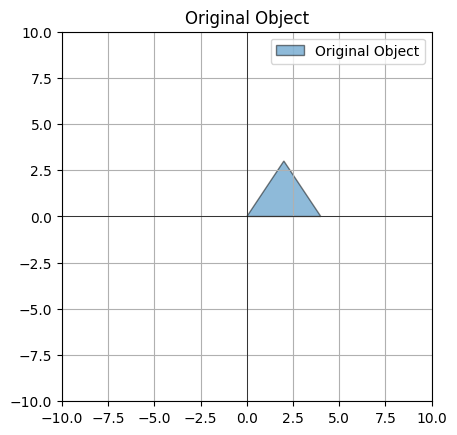

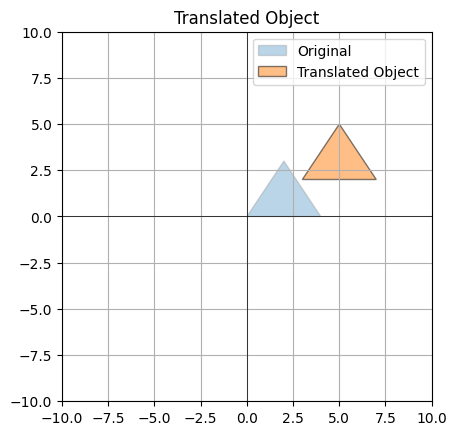

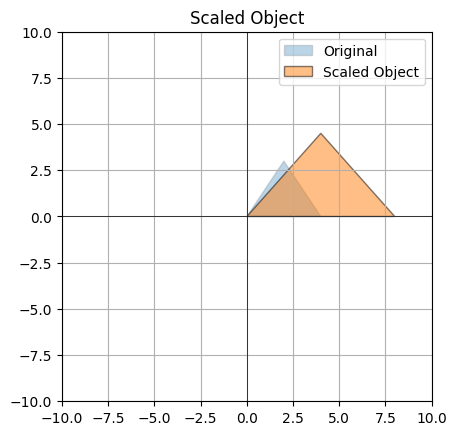

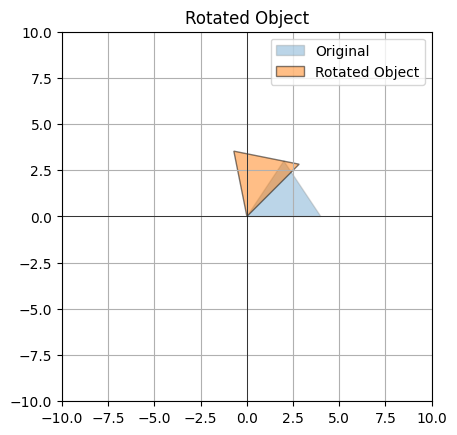

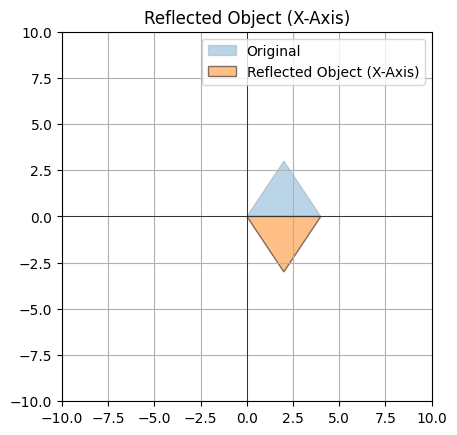

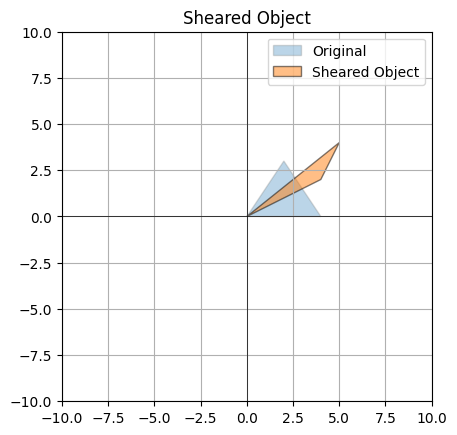

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(points, title, original_points=None):
    plt.figure()
    if original_points is not None:
        plt.fill(original_points[:, 0], original_points[:, 1], edgecolor='gray', alpha=0.3, label='Original')
    plt.fill(points[:, 0], points[:, 1], edgecolor='black', alpha=0.5, label=title)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

def translate(points, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, scaling_matrix)

def rotate(points, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    return apply_transformation(points, reflection_matrix)

def shear(points, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, shearing_matrix)

def apply_transformation(points, matrix):
    ones = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack([points, ones])
    transformed_points = homogeneous_points @ matrix.T
    return transformed_points[:, :2]

# Define the initial 2D object (e.g., a triangle)
original_points = np.array([
    [0, 0],
    [4, 0],
    [2, 3],
    [0, 0]  # Closing the shape
])

# Plot the original object
plot_object(original_points, "Original Object")

# Translation
translated_points = translate(original_points, 3, 2)
plot_object(translated_points, "Translated Object", original_points)

# Scaling
scaled_points = scale(original_points, 2, 1.5)
plot_object(scaled_points, "Scaled Object", original_points)

# Rotation
rotated_points = rotate(original_points, 45)
plot_object(rotated_points, "Rotated Object", original_points)

# Reflection
reflected_points = reflect(original_points, 'x')
plot_object(reflected_points, "Reflected Object (X-Axis)", original_points)

# Shearing
sheared_points = shear(original_points, 1, 0.5)
plot_object(sheared_points, "Sheared Object", original_points)


In [ ]:
import cv2

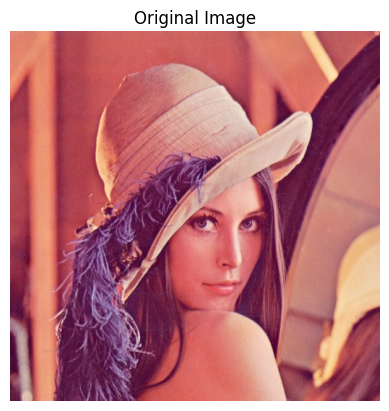

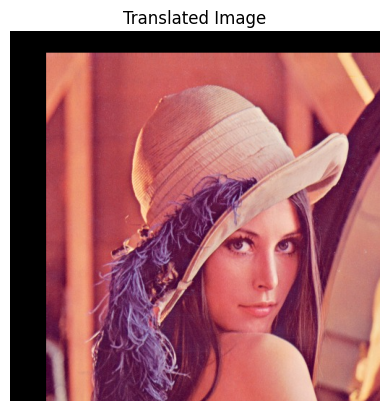

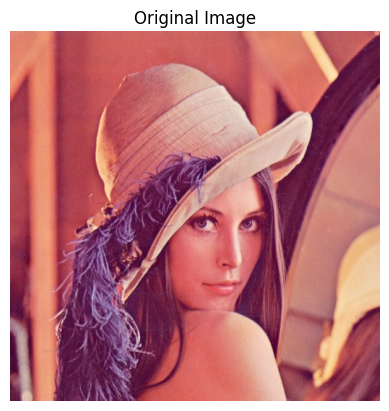

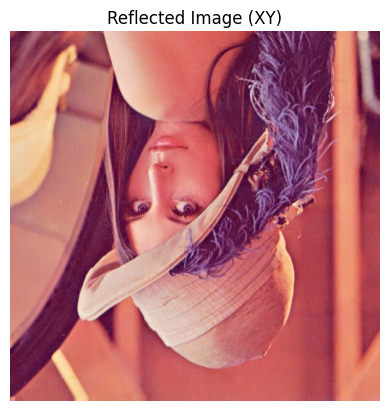

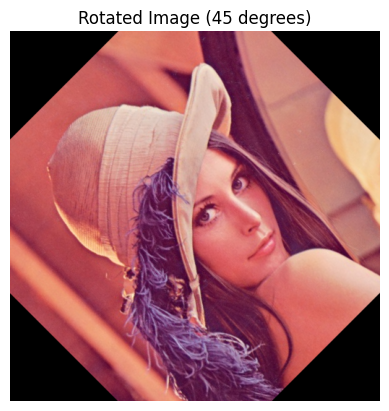

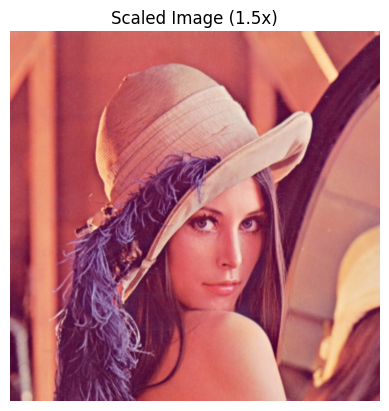

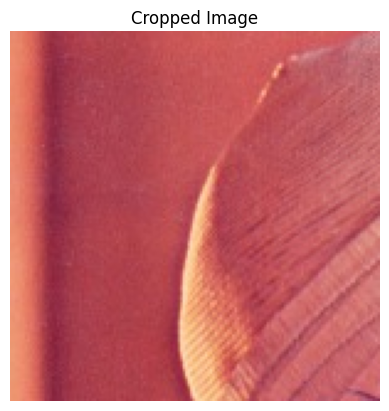

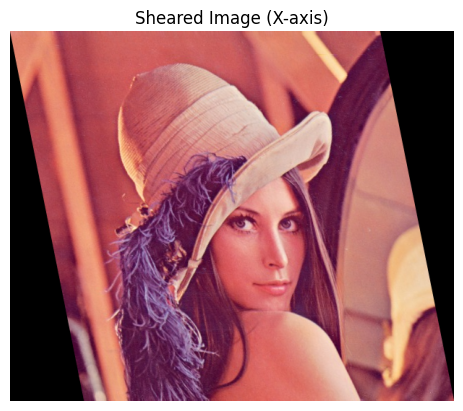

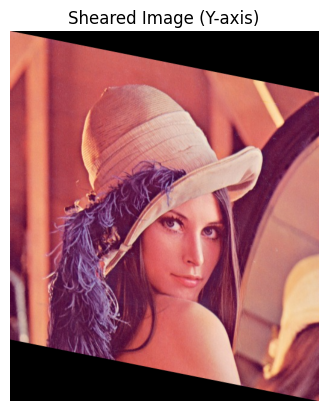

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "/content/SAMPLE.jpg"  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Display the original image
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 50, 30)
display_image("Translated Image", translated_image)
display_image("Original Image", image)

# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'xy'")
    return reflected_image

reflected_image = reflect_image(image, 'xy')
display_image("Reflected Image (XY)", reflected_image)

# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image("Rotated Image (45 degrees)", rotated_image)

# Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image("Scaled Image (1.5x)", scaled_image)

# Cropping
def crop_image(image, start_x, start_y, end_x, end_y):
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

cropped_image = crop_image(image, 50, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# Shearing in X-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_image

sheared_image_x = shear_image_x(image, 0.2)
display_image("Sheared Image (X-axis)", sheared_image_x)

# Shearing in Y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_image

sheared_image_y = shear_image_y(image, 0.2)
display_image("Sheared Image (Y-axis)", sheared_image_y)
